In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing LIbraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pylab as py

from sklearn.impute import SimpleImputer

from sklearn.feature_selection import mutual_info_regression
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import RobustScaler, PowerTransformer 

from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import  OneHotEncoder

from sklearn.model_selection import KFold, cross_val_score , train_test_split

from sklearn.ensemble import RandomForestClassifier,StackingClassifier
 
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Oversample imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
 
from imblearn.over_sampling import BorderlineSMOTE, SMOTE,ADASYN

from matplotlib import pyplot
from numpy import where

import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv", parse_dates=[3])
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
# import pandas_profiling as pp

# # Generate a report using pandas profiling
# profile = pp.ProfileReport(df)

# # Save the report to an HTML file
# profile.to_file('report.html')

# display(profile)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  object 
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ MB


In [ ]:
df.describe(include='object')

,person_home_ownership,person_emp_length,loan_intent,loan_grade,cb_person_default_on_file
count,32581,31686,32581,32581,32581
unique,4,36,6,7,2
top,RENT,0.0,EDUCATION,A,N
freq,16446,4105,6453,10777,26836


In [ ]:
# To spot missing values
df.describe()


,person_age,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
#Checking the number of missing values in each column
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Text(0.5, 1.0, 'Missing Iquitos Data')

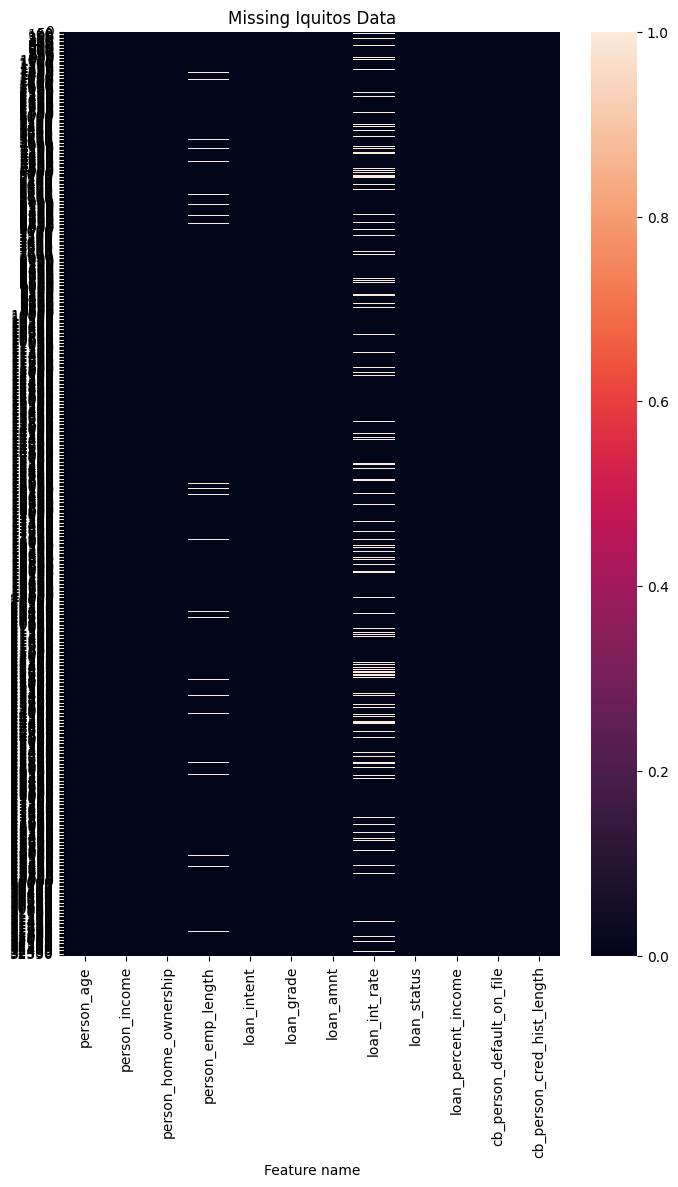

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
sns.heatmap(df.isnull().reset_index(drop=True), yticklabels = 50)
plt.xlabel("Feature name")
plt.title("Missing Iquitos Data")

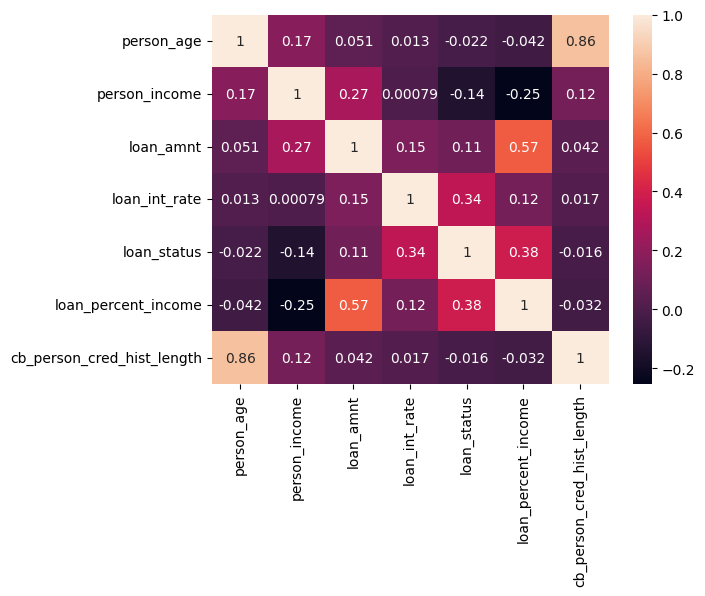

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np


# select numerical columns
numerical_cols = [numname for numname in df.columns if df[numname].dtype in ['int64', 'float64']]

# remove 'loan_status' column from the list of numerical columns
numerical_cols.remove("loan_status")

# fill missing numerical values with the median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# fill missing categorical values with the mode
for col in ['loan_grade', 'cb_person_default_on_file']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# convert 'person_emp_length' column to numerical and fill missing values with the median
df['person_emp_length'] = pd.to_numeric(df['person_emp_length'], errors='coerce')
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

# display the number of missing values after filling missing values
print(df.isnull().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


Text(0.5, 1.0, 'Cleaned Data')

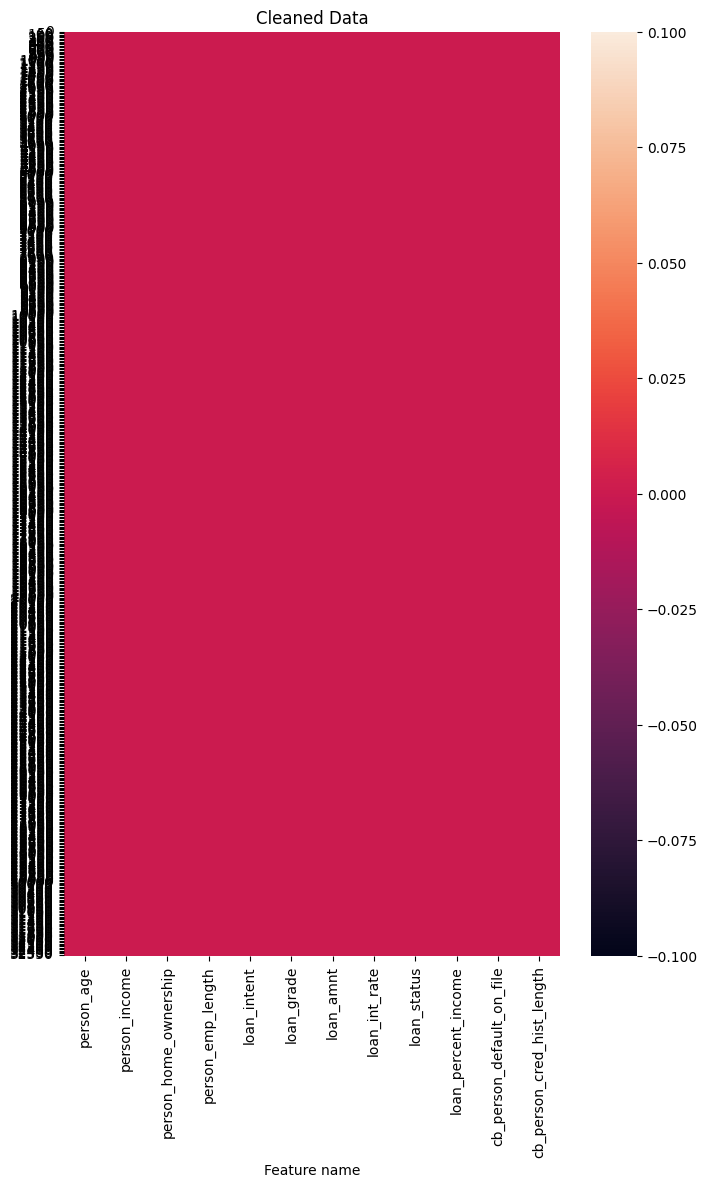

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
sns.heatmap(df.isnull().reset_index(drop=True), yticklabels = 50)
plt.xlabel("Feature name")
plt.title("Cleaned Data")

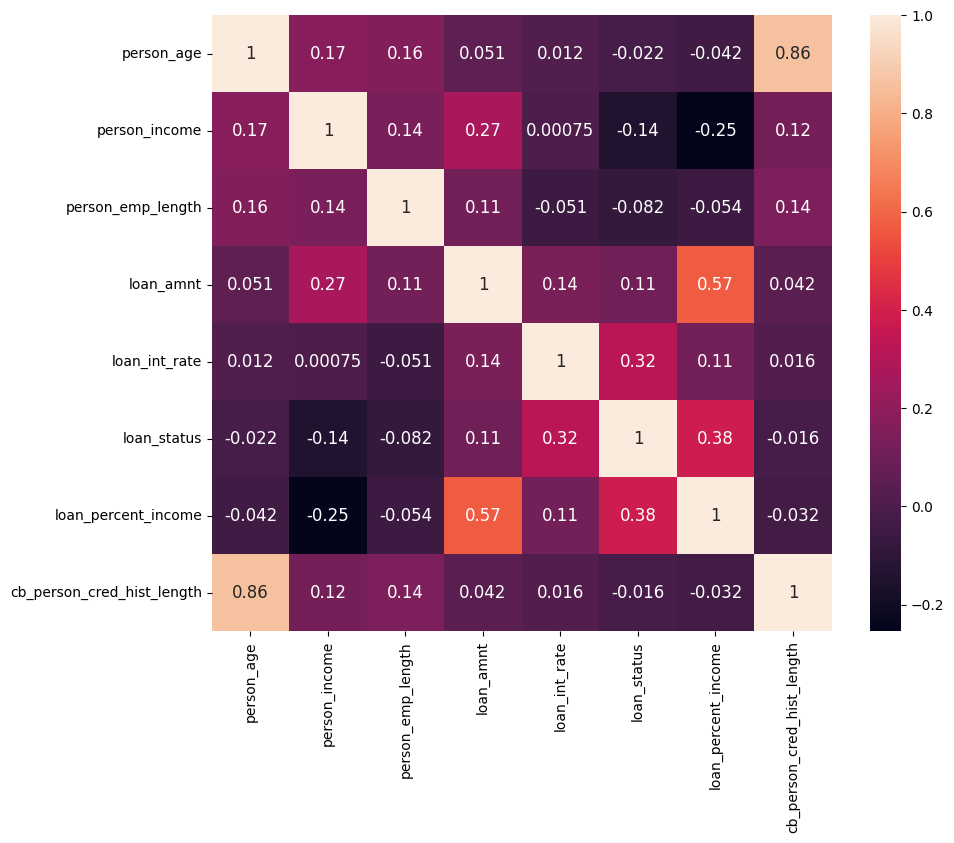

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# set figure size
fig, ax = plt.subplots(figsize=(10,8))

# create heatmap with larger font size for annotations
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12})

# show plot
plt.show()

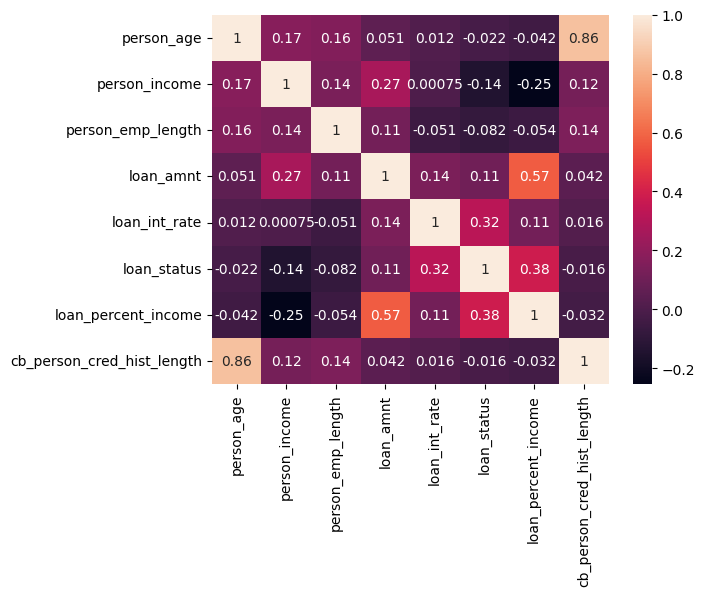

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
numerical_cols1 = [numname for numname in df.columns if df[numname].dtype in ['int64', 'float64']]
numerical_cols1.remove("loan_status")

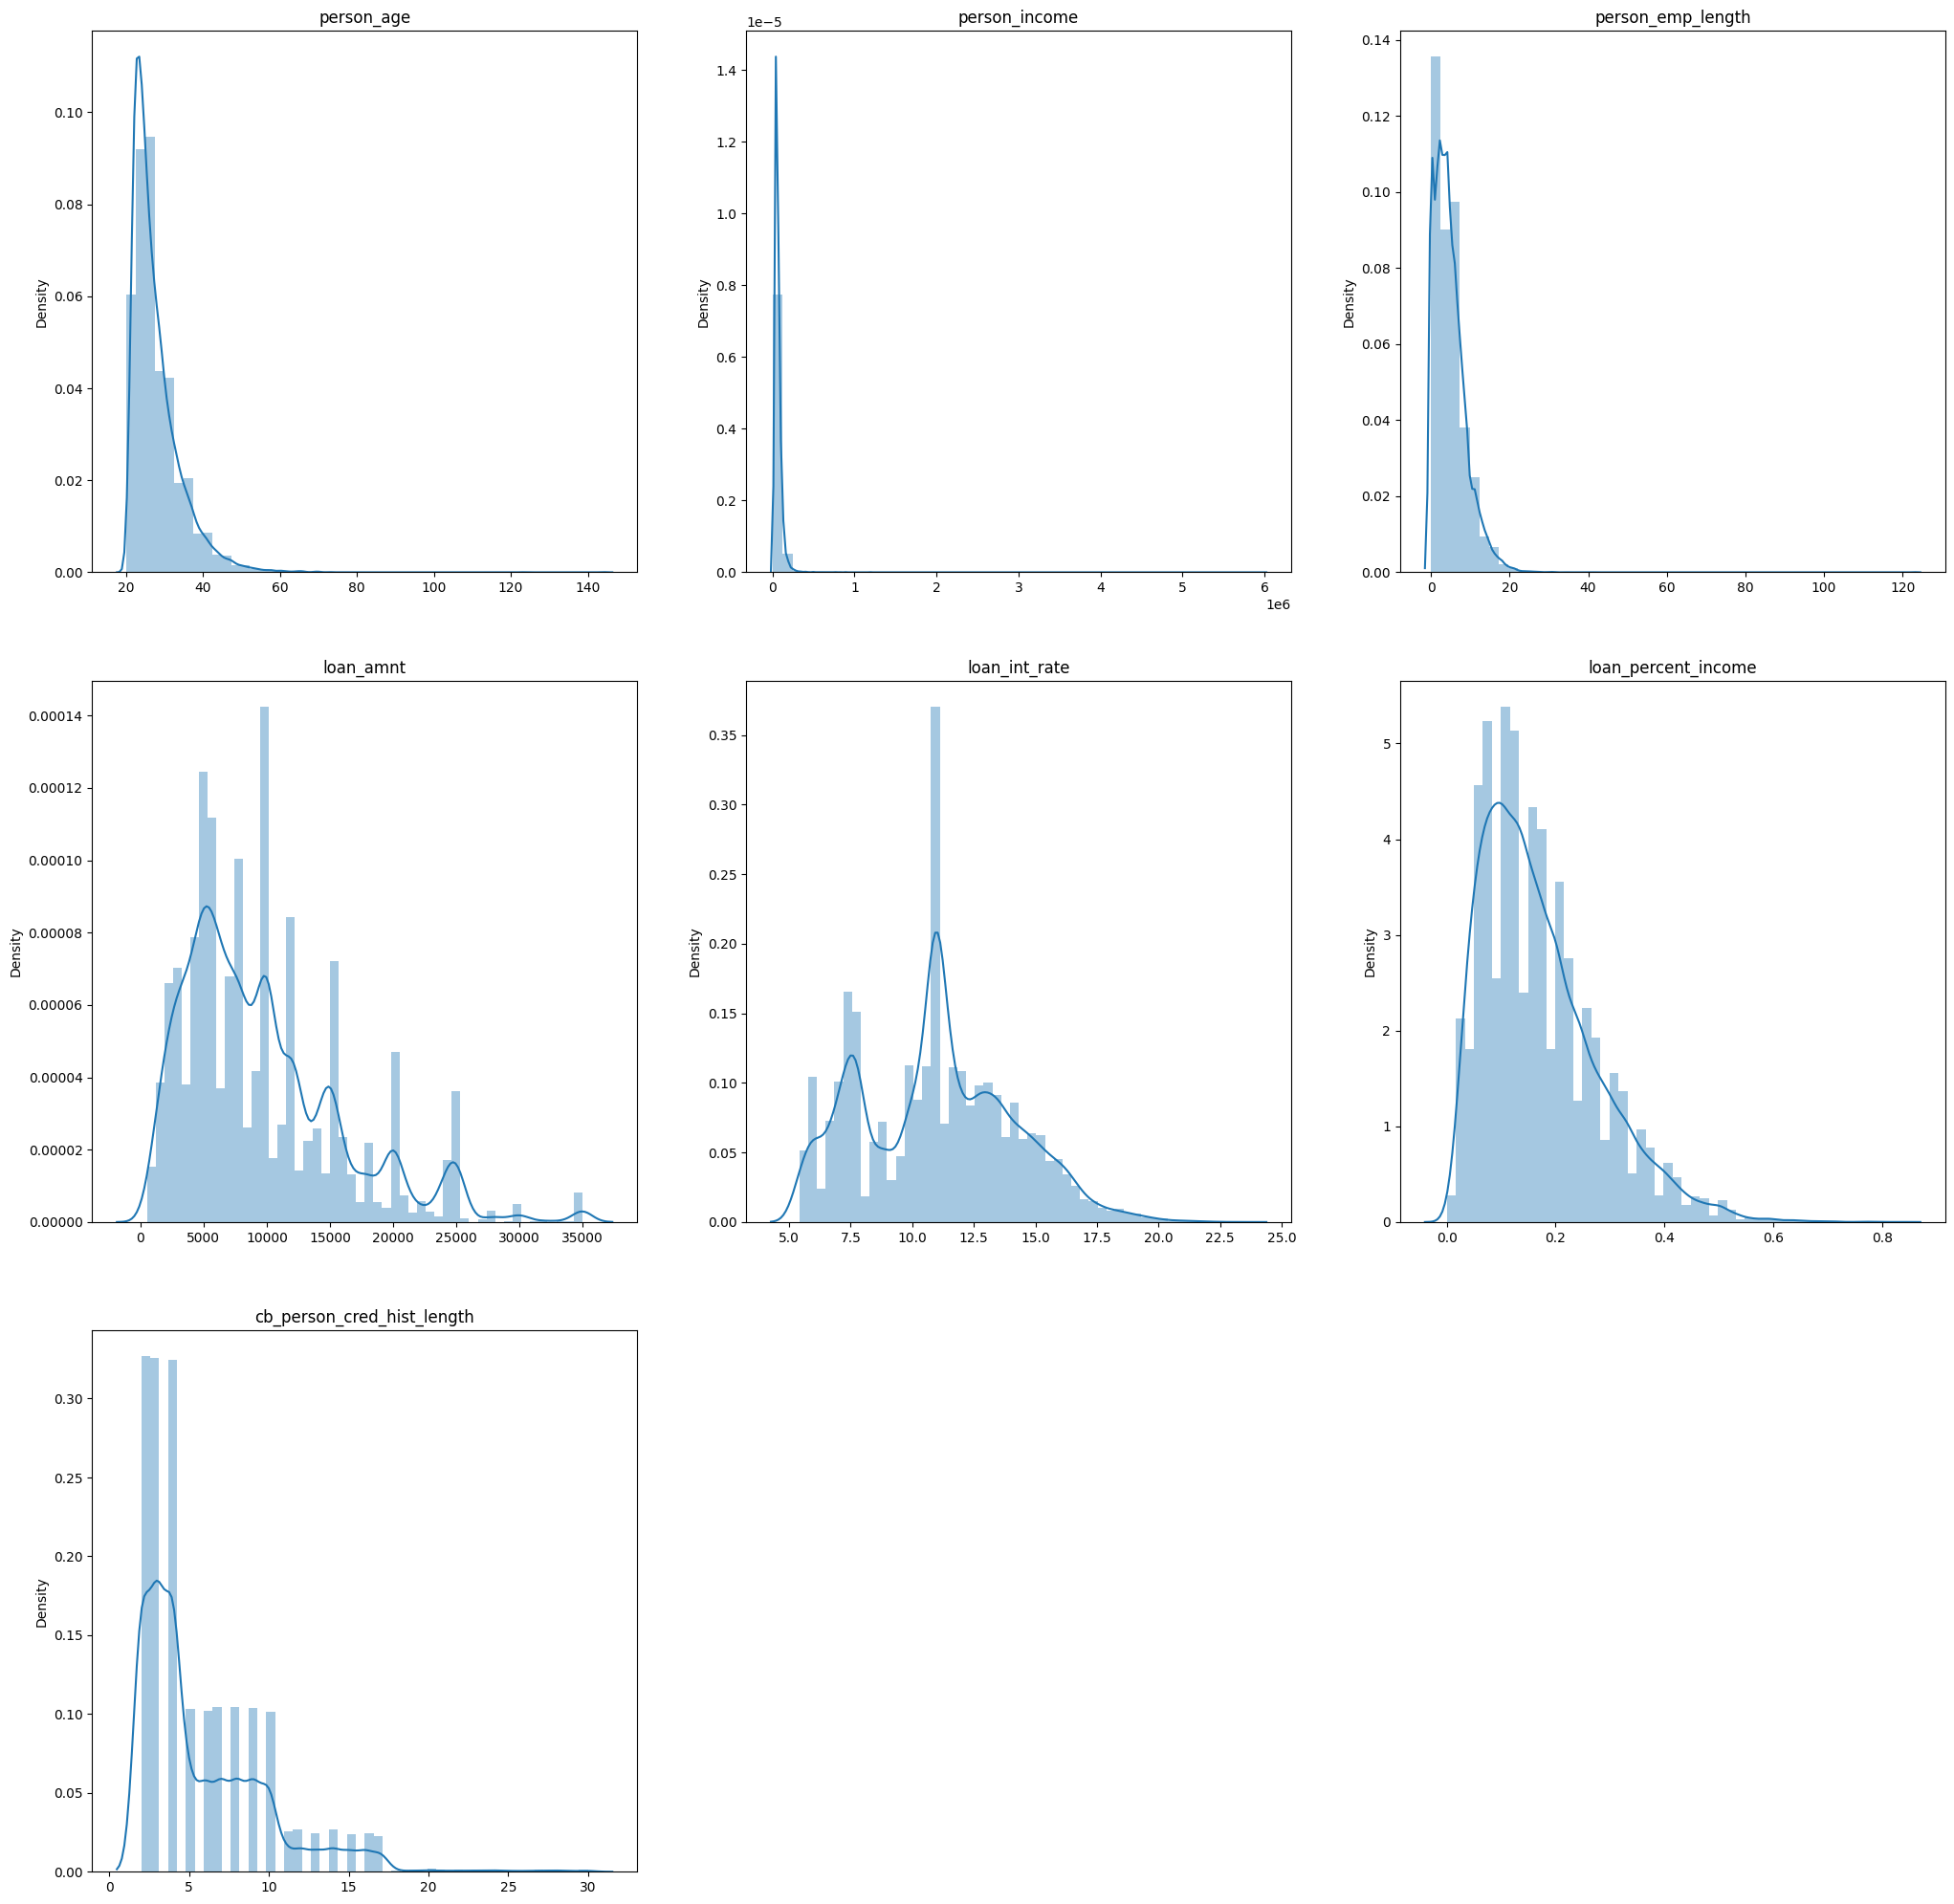

In [ ]:
plt.figure(figsize = (25, 25))
for i in enumerate(numerical_cols1):
    plt.subplot(3, 3,i[0]+1)
    #sns.countplot(i[1],data = df)
    sns.distplot(df, x = df[i[1]])
    plt.title(i[1])

In [ ]:
#Checking the number of missing values in each column
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

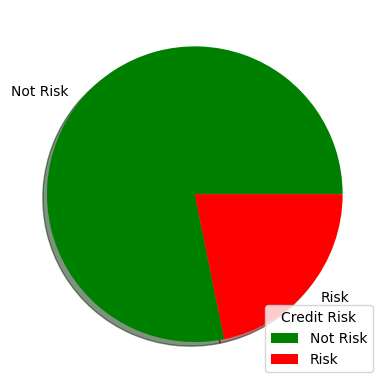

In [ ]:
#visualising the "label" column 
plt.pie(df["loan_status"].value_counts(),labels = ["Not Risk","Risk"],colors = ["g","r"],shadow = True)
plt.legend(title ="Credit Risk")
plt.show() 
#This shows that the dataset is Imbalanced

Variable of interest

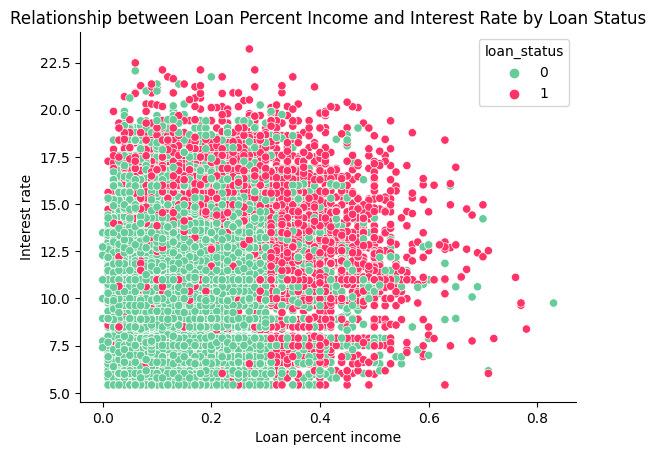

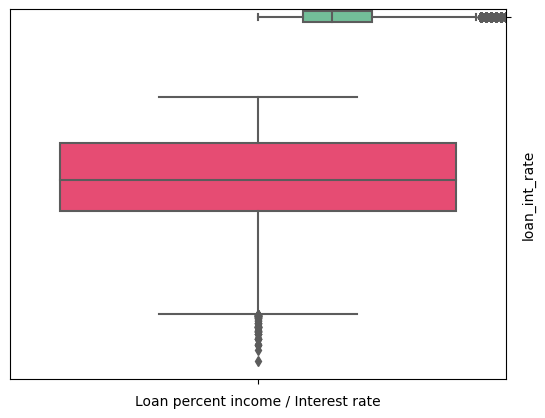

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plot5 = sns.scatterplot(x="loan_percent_income", y="loan_int_rate", hue="loan_status", data=df, palette=["#66cc99", "#ff3366"])
plot5.set(xlabel="Loan percent income", ylabel="Interest rate", title="Relationship between Loan Percent Income and Interest Rate by Loan Status")
sns.despine()

# Add marginal boxplots for loan_percent_income and loan_int_rate
fig, ax = plt.subplots()
sns.boxplot(x=df["loan_percent_income"], ax=ax, color="#66cc99")
sns.boxplot(y=df["loan_int_rate"], ax=ax, color="#ff3366")
ax.set_xlabel("Loan percent income / Interest rate")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.show()


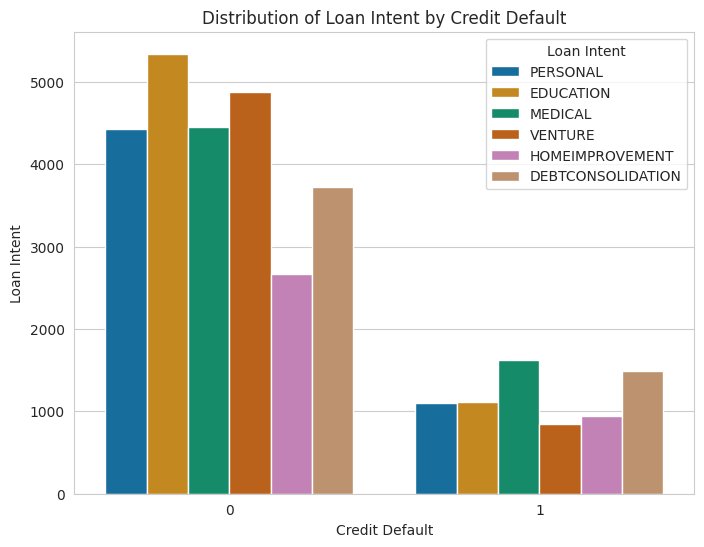

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', hue='loan_intent', data=df, palette='colorblind')
plt.xlabel('Credit Default')
plt.ylabel('Loan Intent')
plt.legend(title='Loan Intent', loc='upper right')
plt.title('Distribution of Loan Intent by Credit Default')
plt.show()


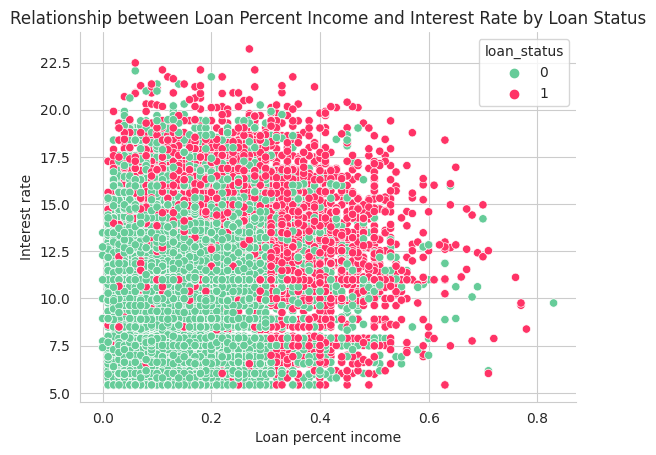

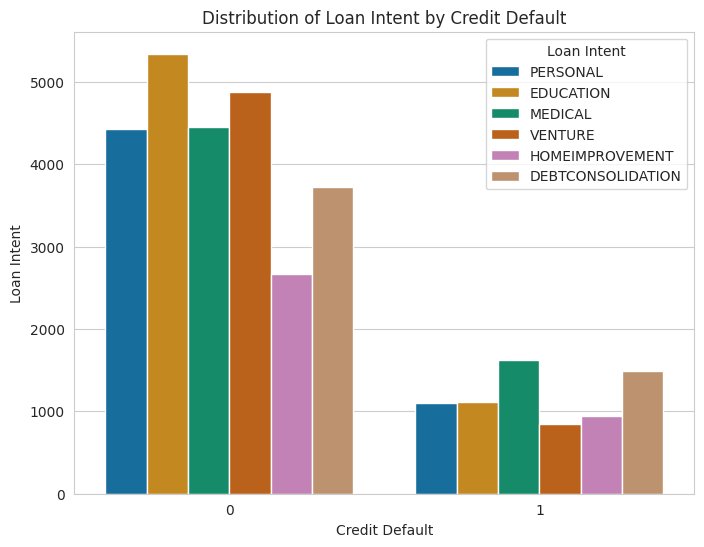

In [ ]:
#one image
import seaborn as sns
import matplotlib.pyplot as plt

plot5 = sns.scatterplot(x="loan_percent_income", y="loan_int_rate", hue="loan_status", data=df, palette=["#66cc99", "#ff3366"])
plot5.set(xlabel="Loan percent income", ylabel="Interest rate", title="Relationship between Loan Percent Income and Interest Rate by Loan Status")
sns.despine()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x='loan_status', hue='loan_intent', data=df, palette='colorblind')
plt.xlabel('Credit Default')
plt.ylabel('Loan Intent')
plt.legend(title='Loan Intent', loc='upper right')
plt.title('Distribution of Loan Intent by Credit Default')

plt.show()





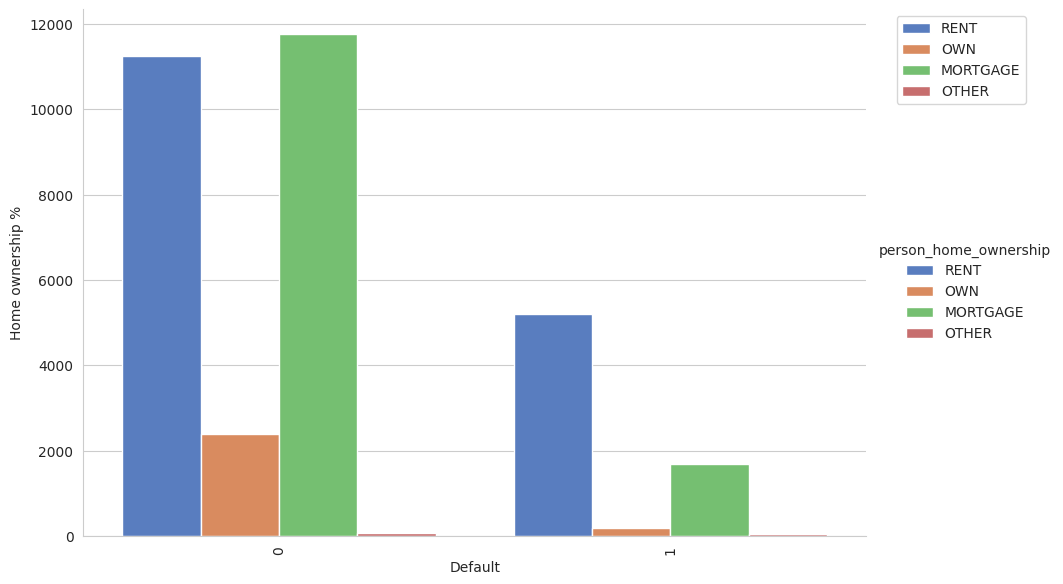

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot
sns.catplot(x="loan_status", hue="person_home_ownership", kind="count", data=df, 
            palette="muted", height=6, aspect=1.5)

# Set axis labels and legend title
plt.xlabel("Default")
plt.ylabel("Home ownership %")
plt.legend(title="Type of ownership:")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set plot background and legend position
sns.set_style("whitegrid", {'axes.grid' : False})
plt.legend(loc="upper left", bbox_to_anchor=(1.03, 1))

# Show plot
plt.show()



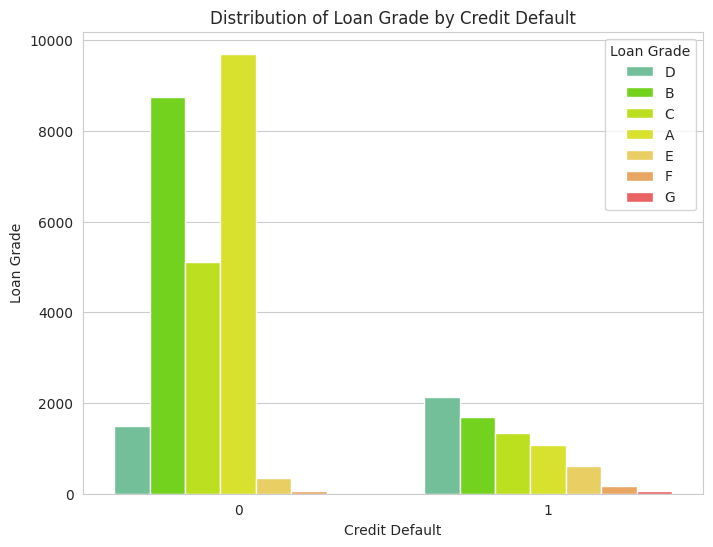

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', hue='loan_grade', data=df, palette=["#66cc99", "#70F000", "#D0FF00", "#F3FF0F", "#FFDB4D", "#FFA64D", "#FF4D4D"])
plt.xlabel('Credit Default')
plt.ylabel('Loan Grade')
plt.legend(title='Loan Grade', loc='upper right')
plt.title('Distribution of Loan Grade by Credit Default')
plt.show()

In [ ]:
#preprocessing
x = df.drop("loan_status", axis=1)
y = df.loan_status

#Splitting Dataset
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Balancing the dataset
os = RandomOverSampler(sampling_strategy=0.7)
X_train, y_train = os.fit_resample(X_train, y_train)
print("New 'X_train' has", X_train.shape, "New 'y_train' has", y_train.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))


x_test, y_test = os.fit_resample(x, y)
print(" New 'x' has",x_test.shape,"        New 'Y' has",y_test.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_test)))


X_train.isnull().sum()
x_test.isnull().sum()

New 'X_train' has (34731, 11) New 'y_train' has (34731,)
Original dataset shape Counter({0: 25473, 1: 7108})
Resampled dataset shape Counter({0: 20430, 1: 14301})
 New 'x' has (43304, 11)         New 'Y' has (43304,)
Original dataset shape Counter({0: 25473, 1: 7108})
Resampled dataset shape Counter({0: 25473, 1: 17831})


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Selected Features:
['loan_int_rate' 'loan_percent_income' 'person_home_ownership_OTHER'
 'loan_grade_D']


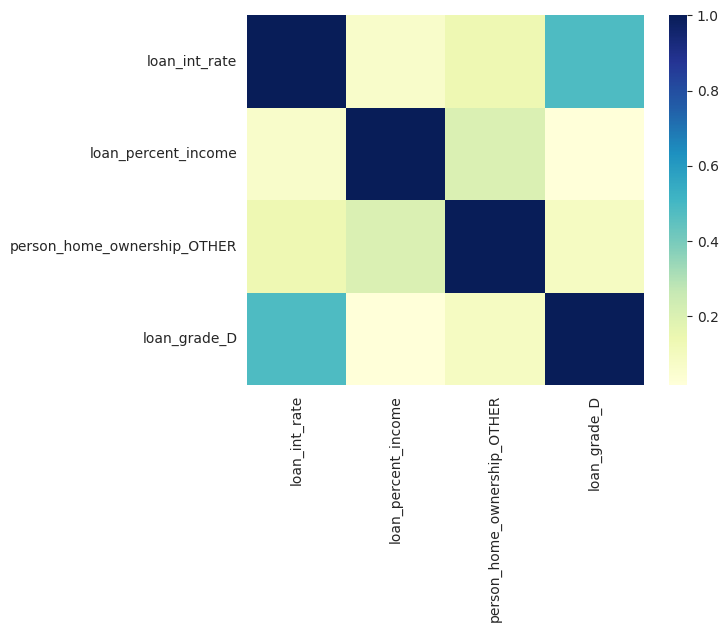

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

# Define columns by type
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = [col for col in X_train.columns if X_train[col].nunique() < 10 and X_train[col].dtype == "object"]

# Define transformers
numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

# Define the feature selection pipeline
selector = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('percentile', SelectPercentile(score_func=f_classif, percentile=15))
])

# Oversample the minority class in the training set
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


# Train the selector on the resampled training set
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)

# Get the selected features
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
onehot_cols = []
for i, col in enumerate(categorical_cols):
    unique_vals = X_train[col].dropna().unique()
    onehot_col_names = [f"{col}_{val}" for val in unique_vals]
    onehot_cols.extend(onehot_col_names)

feature_names = np.concatenate((numerical_cols, onehot_cols))

# Print the selected features
selected_feature_names = feature_names[selector.named_steps['percentile'].get_support()]
print('Selected Features:')
print(selected_feature_names)

# Subset the training and testing sets to include only the selected features
X_test_selected = selector.transform(x_test)
X_train_selected = selector.transform(X_train_resampled)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of the selected features
selected_features_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)

# Calculate the correlation matrix
corr_matrix= selected_features_df.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Show the plot
plt.show()





In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df,y_train_resampled,test_size=0.3, random_state=42) 

from pycaret.classification import *

# Train and compare multiple classifiers using PyCaret's compare_models function with selected features
setup(data=X_train, target=y_train, session_id=123)
best_model = compare_models()

# Print the best model
print(best_model)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28602, 5)"
4,Transformed data shape,"(28602, 5)"
5,Transformed train set shape,"(20021, 5)"
6,Transformed test set shape,"(8581, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8412,0.9208,0.8520,0.8335,0.8426,0.6823,0.6826,1.9040
et,Extra Trees Classifier,0.8397,0.9131,0.8323,0.8444,0.8382,0.6793,0.6795,1.5360
dt,Decision Tree Classifier,0.8345,0.8892,0.8334,0.8348,0.8340,0.6689,0.6691,0.0750
xgboost,Extreme Gradient Boosting,0.8130,0.8953,0.7409,0.8652,0.7981,0.6260,0.6326,0.8220
lightgbm,Light Gradient Boosting Machine,0.8073,0.8858,0.7139,0.8771,0.7870,0.6144,0.6254,0.4900
knn,K Neighbors Classifier,0.8070,0.8846,0.8157,0.8012,0.8083,0.6139,0.6141,0.1490
gbc,Gradient Boosting Classifier,0.7950,0.8653,0.6964,0.8667,0.7721,0.5899,0.6017,1.1760
qda,Quadratic Discriminant Analysis,0.7900,0.8392,0.7077,0.8464,0.7708,0.5799,0.5879,0.0940
nb,Naive Bayes,0.7853,0.8333,0.6888,0.8527,0.7620,0.5705,0.5813,0.0620
ada,Ada Boost Classifier,0.7805,0.8481,0.7211,0.8178,0.7662,0.5610,0.5650,0.5110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
# Tuning the Random Forest model
rf_model = create_model('rf')
tuned_rf = tune_model(rf_model)

#Tuning the Extra Tree model
et_model = create_model('et')
tuned_et= tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8457,0.9285,0.8550,0.8391,0.8470,0.6915,0.6916
1,0.8332,0.9160,0.8298,0.8348,0.8323,0.6663,0.6663
2,0.8402,0.9176,0.8388,0.8405,0.8397,0.6803,0.6803
3,0.8427,0.9228,0.8549,0.8340,0.8443,0.6853,0.6855
4,0.8541,0.9273,0.8779,0.8376,0.8573,0.7083,0.7091
5,0.8437,0.9245,0.8649,0.8292,0.8466,0.6873,0.6880
6,0.8292,0.9131,0.8478,0.8168,0.8320,0.6584,0.6588
7,0.8352,0.9211,0.8498,0.8251,0.8373,0.6703,0.6706
8,0.8417,0.9156,0.8438,0.8396,0.8417,0.6833,0.6833


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7943,0.8570,0.6940,0.8675,0.7711,0.5885,0.6006
1,0.7817,0.8515,0.6657,0.8659,0.7527,0.5632,0.5789
2,0.7992,0.8506,0.6807,0.8912,0.7719,0.5982,0.6156
3,0.7977,0.8544,0.6767,0.8918,0.7695,0.5952,0.6133
4,0.7992,0.8722,0.6917,0.8803,0.7747,0.5982,0.6124
5,0.7987,0.8659,0.6937,0.8772,0.7747,0.5972,0.6107
6,0.7932,0.8436,0.6747,0.8834,0.7650,0.5862,0.6032
7,0.8057,0.8755,0.7017,0.8851,0.7828,0.6112,0.6247
8,0.7792,0.8469,0.6547,0.8708,0.7474,0.5582,0.5762


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8442,0.9214,0.8320,0.8525,0.8421,0.6885,0.6887
1,0.8337,0.9091,0.8128,0.8476,0.8298,0.6673,0.6679
2,0.8437,0.9097,0.8188,0.8611,0.8394,0.6873,0.6881
3,0.8392,0.9147,0.8358,0.8409,0.8384,0.6783,0.6783
4,0.8516,0.9169,0.8559,0.8482,0.8520,0.7033,0.7033
5,0.8457,0.9210,0.8519,0.8409,0.8463,0.6913,0.6914
6,0.8267,0.9026,0.8218,0.8293,0.8255,0.6533,0.6534
7,0.8312,0.9127,0.8288,0.8322,0.8305,0.6623,0.6623
8,0.8362,0.9067,0.8228,0.8448,0.8337,0.6723,0.6725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7923,0.8556,0.7110,0.8484,0.7737,0.5845,0.5923
1,0.7807,0.8552,0.6887,0.8431,0.7581,0.5613,0.5709
2,0.7892,0.8481,0.6787,0.8703,0.7627,0.5782,0.5927
3,0.7907,0.8551,0.6987,0.8554,0.7691,0.5813,0.5912
4,0.7987,0.8674,0.7147,0.8582,0.7799,0.5973,0.6058
5,0.7992,0.8576,0.7047,0.8681,0.7779,0.5982,0.6091
6,0.7842,0.8405,0.6977,0.8428,0.7634,0.5683,0.5769
7,0.8082,0.8669,0.7257,0.8683,0.7906,0.6163,0.6247
8,0.7817,0.8468,0.6787,0.8539,0.7563,0.5633,0.5755


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


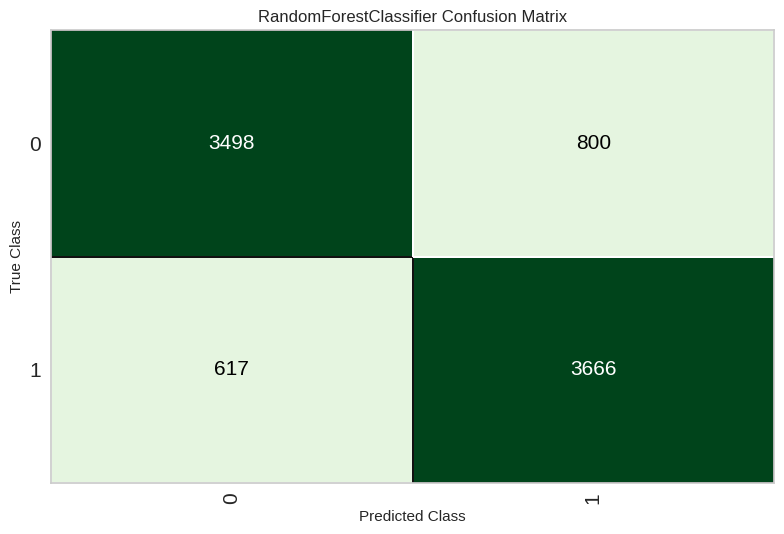

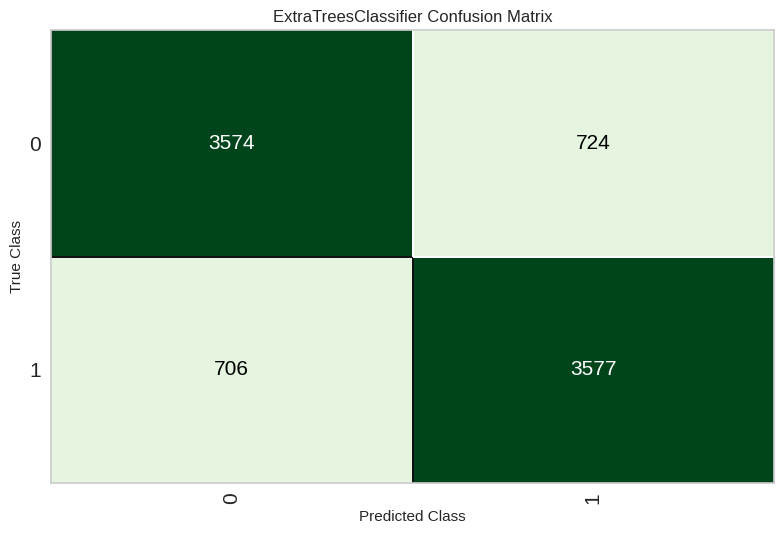

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

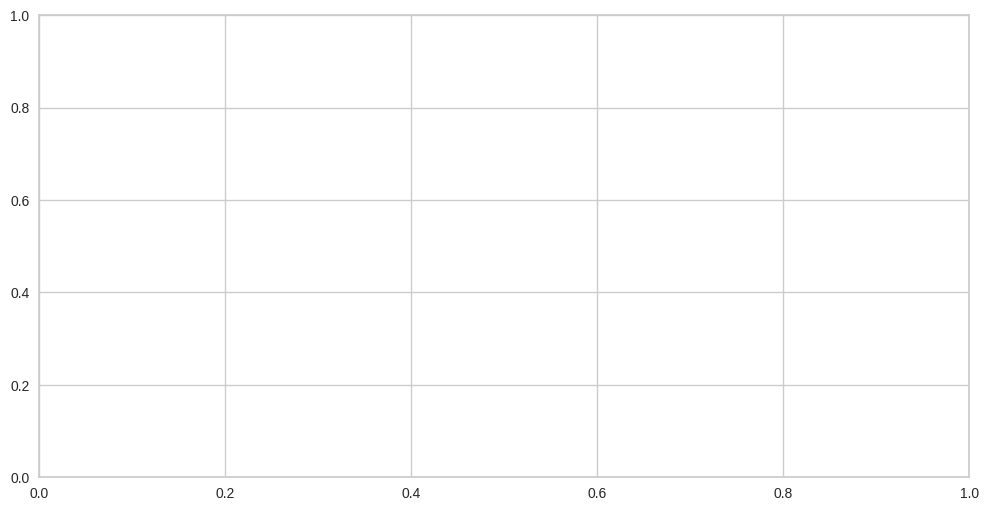

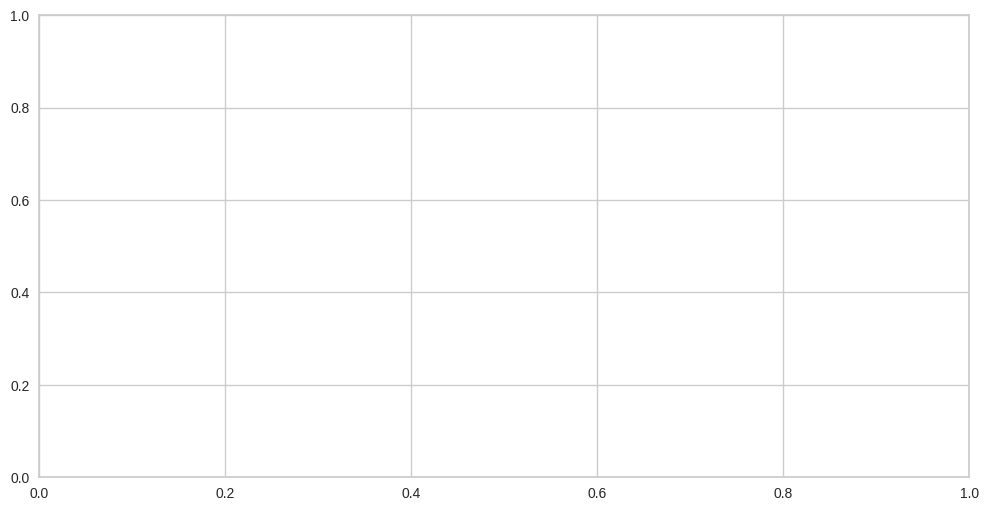

In [ ]:
# Visualizing model performance
plot_model(tuned_rf, plot='confusion_matrix')
plot_model(tuned_et, plot='confusion_matrix')



# # Evaluating model performance
evaluate_model(tuned_rf)
evaluate_model(tuned_et)

# # # Predicting on new dataset
# # predict_model(tuned_rf, data=x_test)
# # predict_model(tuned_et, data=x_test)


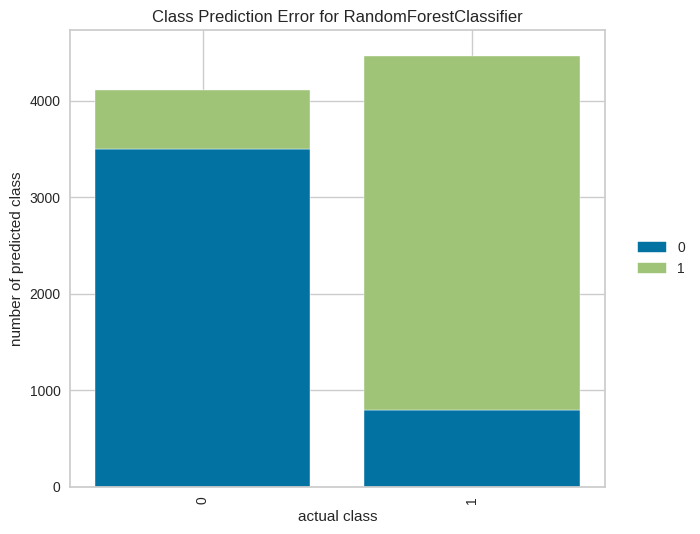

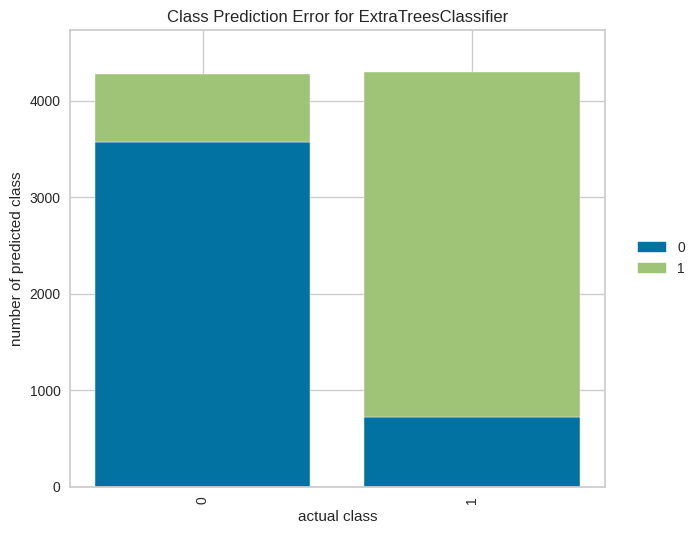

In [ ]:
# Evaluating model performance
# plotting confusion matrix
plot_model(tuned_rf, plot='error')
plot_model(tuned_et, plot='error')

# # evaluating model performance
# evaluate_model(tuned_rf)
# evaluate_model(tuned_et)






In [ ]:
# Train a Random Forest classifier on the selected features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# # Convert the numpy array to a pandas DataFrame
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_feature_names)
print(X_test_selected)



# # # Fit the model on the selected features
# # tuned_rf.fit(X_train_selected, y_train_resampled)

# # Make predictions on the testing set
rf_predictions = predict_model(tuned_rf, data=X_test)

et_predictions= predict_model(tuned_et, data=X_test)



# Evaluate the performance of blended models
print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions['prediction_label'], digits=3))



# Evaluate the performance of blended models
print("Extra Trees Performance:")
print(classification_report(y_test, et_predictions['prediction_label'], digits=3))

# # Print the classification report
# print(classification_report(y_test, y_pred))




# # Generate predictions using the tuned_rf and tuned_et models
# y_pred_rf = predict_model(tuned_rf, data=X_test_selected)
# y_pred_et = predict_model(tuned_et, data=X_test_selected)

# # Compare the performance of the models
# from sklearn.metrics import classification_report
# print('Tuned Random Forest Performance:')
# print(classification_report(y_test, rf_predictions))

# print('Tuned Extra Trees Performance:')
# print(classification_report(y_test,rf_predictions))


       loan_int_rate  loan_percent_income  person_home_ownership_OTHER  \
0              16.02                 0.59                          1.0   
1              11.14                 0.10                          0.0   
2              12.87                 0.57                          0.0   
3              15.23                 0.53                          1.0   
4              14.27                 0.55                          1.0   
...              ...                  ...                          ...   
43299          13.98                 0.42                          1.0   
43300          16.40                 0.26                          0.0   
43301          15.62                 0.04                          1.0   
43302          13.47                 0.39                          1.0   
43303           9.25                 0.11                          0.0   

       loan_grade_D  
0               1.0  
1               0.0  
2               0.0  
3               0.0  
4

Random Forest Performance:
              precision    recall  f1-score   support

           0      0.852     0.824     0.838      6103
           1      0.831     0.858     0.844      6155

    accuracy                          0.841     12258
   macro avg      0.842     0.841     0.841     12258
weighted avg      0.842     0.841     0.841     12258

Extra Trees Performance:
              precision    recall  f1-score   support

           0      0.842     0.846     0.844      6103
           1      0.846     0.842     0.844      6155

    accuracy                          0.844     12258
   macro avg      0.844     0.844     0.844     12258
weighted avg      0.844     0.844     0.844     12258



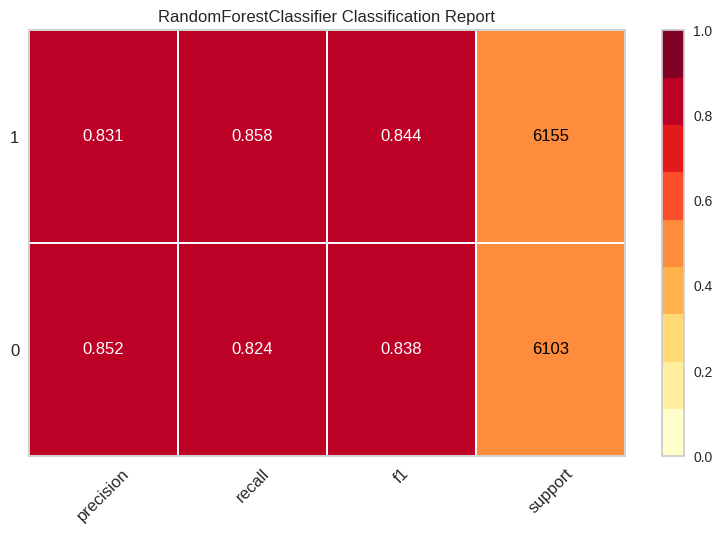

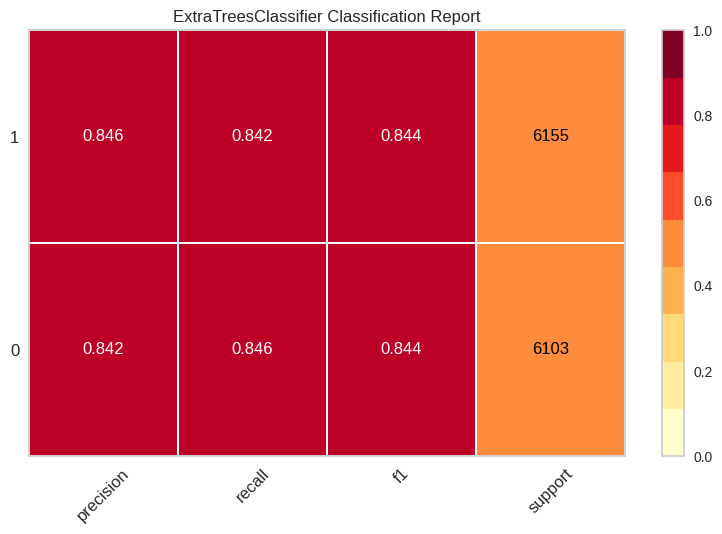

<Axes: title={'center': 'ExtraTreesClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the visualizer for Random Forest
visualizer = ClassificationReport(tuned_rf, classes=[0,1], support=True)

# Fit the visualizer and generate the classification report
visualizer.score(X_test, y_test)
visualizer.show()

# Instantiate the visualizer for Extra Trees
visualizer = ClassificationReport(tuned_et, classes=[0,1], support=True)

# Fit the visualizer and generate the classification report
visualizer.score(X_test, y_test)
visualizer.show()


Random Forest Model Performance:
Random Forest -- Accuracy: 0.841, Precision: 0.831, Recall: 0.858, F1-score: 0.844, AUC-ROC score: 0.588


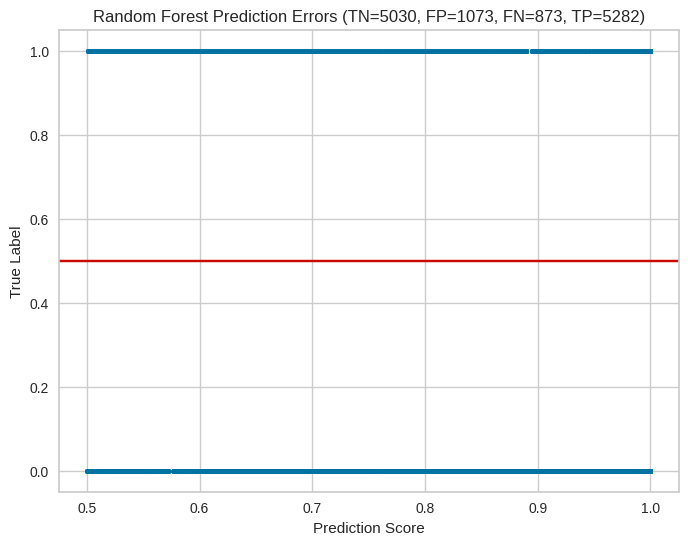

Random Forest Prediction Errors (TN=5030, FP=1073, FN=873, TP=5282)
Extra Trees Model Performance:
Extra Trees -- Accuracy: 0.844, Precision: 0.846, Recall: 0.842, F1-score: 0.844, AUC-ROC score: 0.556


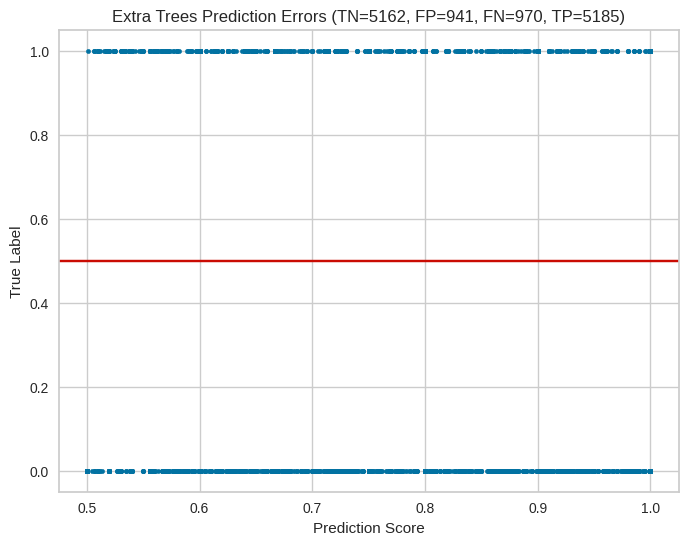

Extra Trees Prediction Errors (TN=5162, FP=941, FN=970, TP=5185)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the models and generate prediction error plots
print("Random Forest Model Performance:")
rf_acc = accuracy_score(y_test, rf_predictions['prediction_label'])
rf_prec = precision_score(y_test, rf_predictions['prediction_label'])
rf_recall = recall_score(y_test, rf_predictions['prediction_label'])
rf_f1 = f1_score(y_test, rf_predictions['prediction_label'])
rf_auc_score = roc_auc_score(y_test, rf_predictions['prediction_score'])
print(f"Random Forest -- Accuracy: {rf_acc:.3f}, Precision: {rf_prec:.3f}, Recall: {rf_recall:.3f}, F1-score: {rf_f1:.3f}, AUC-ROC score: {rf_auc_score:.3f}")

# Generate confusion matrix and plot prediction errors
rf_cm = confusion_matrix(y_test, rf_predictions['prediction_label'])
rf_tn, rf_fp, rf_fn, rf_tp = rf_cm.ravel()
plt.figure(figsize=(8,6))
plt.scatter(rf_predictions['prediction_score'], rf_predictions['prediction_label'], s=10)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Prediction Score')
plt.ylabel('True Label')
plt.title(f"Random Forest Prediction Errors (TN={rf_tn}, FP={rf_fp}, FN={rf_fn}, TP={rf_tp})")
plt.show()
print(f"Random Forest Prediction Errors (TN={rf_tn}, FP={rf_fp}, FN={rf_fn}, TP={rf_tp})")

print("Extra Trees Model Performance:")
et_acc = accuracy_score(y_test, et_predictions['prediction_label'])
et_prec = precision_score(y_test, et_predictions['prediction_label'])
et_recall = recall_score(y_test, et_predictions['prediction_label'])
et_f1 = f1_score(y_test, et_predictions['prediction_label'])
et_auc_score = roc_auc_score(y_test, et_predictions['prediction_score'])
print(f"Extra Trees -- Accuracy: {et_acc:.3f}, Precision: {et_prec:.3f}, Recall: {et_recall:.3f}, F1-score: {et_f1:.3f}, AUC-ROC score: {et_auc_score:.3f}")

# Generate confusion matrix and plot prediction errors
et_cm = confusion_matrix(y_test, et_predictions['prediction_label'])
et_tn, et_fp, et_fn, et_tp = et_cm.ravel()
plt.figure(figsize=(8,6))
plt.scatter(et_predictions['prediction_score'], et_predictions['prediction_label'], s=10)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Prediction Score')
plt.ylabel('True Label')
plt.title(f"Extra Trees Prediction Errors (TN={et_tn}, FP={et_fp}, FN={et_fn}, TP={et_tp})")
plt.show()
print(f"Extra Trees Prediction Errors (TN={et_tn}, FP={et_fp}, FN={et_fn}, TP={et_tp})")


In [ ]:
# Combine the two tuned models using blend_models function
blended_models = blend_models(estimator_list=[tuned_rf, tuned_et])


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.9307,0.8530,0.8412,0.8471,0.6925,0.6925
1,0.8367,0.9181,0.8298,0.8408,0.8353,0.6733,0.6734
2,0.8437,0.9197,0.8368,0.8479,0.8423,0.6873,0.6874
3,0.8422,0.9244,0.8549,0.8332,0.8439,0.6843,0.6846
4,0.8521,0.9293,0.8749,0.8364,0.8552,0.7043,0.7051
5,0.8482,0.9277,0.8669,0.8351,0.8507,0.6963,0.6968
6,0.8322,0.9151,0.8498,0.8203,0.8348,0.6644,0.6648
7,0.8342,0.9232,0.8448,0.8266,0.8356,0.6683,0.6685
8,0.8427,0.9178,0.8428,0.8420,0.8424,0.6853,0.6853


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.9307,0.8530,0.8412,0.8471,0.6925,0.6925
1,0.8367,0.9181,0.8298,0.8408,0.8353,0.6733,0.6734
2,0.8437,0.9197,0.8368,0.8479,0.8423,0.6873,0.6874
3,0.8422,0.9244,0.8549,0.8332,0.8439,0.6843,0.6846
4,0.8521,0.9293,0.8749,0.8364,0.8552,0.7043,0.7051
5,0.8482,0.9277,0.8669,0.8351,0.8507,0.6963,0.6968
6,0.8322,0.9151,0.8498,0.8203,0.8348,0.6644,0.6648
7,0.8342,0.9232,0.8448,0.8266,0.8356,0.6683,0.6685
8,0.8427,0.9178,0.8428,0.8420,0.8424,0.6853,0.6853


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Blended Model Performance:
Blended Models -- Accuracy: 0.845, Precision: 0.837, Recall: 0.858, F1-score: 0.848, AUC-ROC score: 0.593


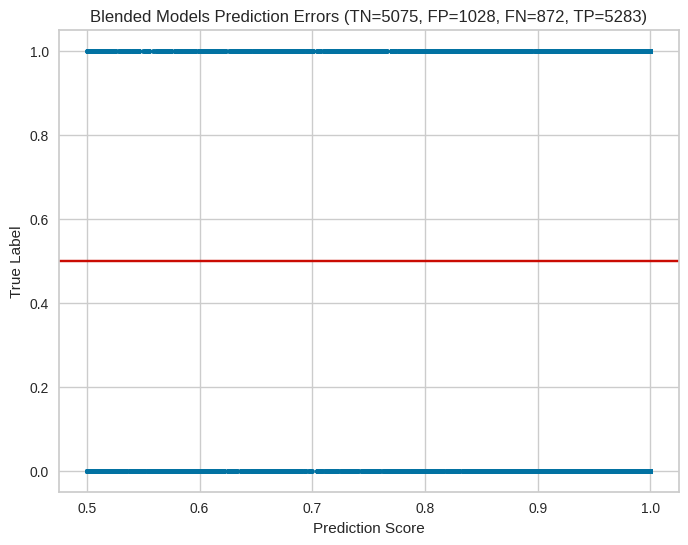

Blended Models Prediction Errors (TN=5075, FP=1028, FN=872, TP=5283)


In [ ]:
blended_models = blend_models(estimator_list=[tuned_rf, tuned_et])
# Generate predictions using the new test set
predictions = predict_model(blended_models, data=X_test)

# Evaluate the performance of blended models
print("Blended Model Performance:")
# print(classification_report(y_test, predict_model(blended_models)['prediction_label']))

# Evaluate the performance of blended models
blended_acc = accuracy_score(y_test, predictions['prediction_label'])
blended_prec = precision_score(y_test, predictions['prediction_label'])
blended_recall = recall_score(y_test, predictions['prediction_label'])
blended_f1 = f1_score(y_test, predictions['prediction_label'])
blended_auc_score = roc_auc_score(y_test, predictions['prediction_score'])
print(f"Blended Models -- Accuracy: {blended_acc:.3f}, Precision: {blended_prec:.3f}, Recall: {blended_recall:.3f}, F1-score: {blended_f1:.3f}, AUC-ROC score: {blended_auc_score:.3f}")

# Generate confusion matrix and plot prediction errors
blended_cm = confusion_matrix(y_test, predictions['prediction_label'])
blended_tn, blended_fp, blended_fn, blended_tp = blended_cm.ravel()
plt.figure(figsize=(8,6))
plt.scatter(predictions['prediction_score'], predictions['prediction_label'], s=10)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Prediction Score')
plt.ylabel('True Label')
plt.title(f"Blended Models Prediction Errors (TN={blended_tn}, FP={blended_fp}, FN={blended_fn}, TP={blended_tp})")
plt.show()
print(f"Blended Models Prediction Errors (TN={blended_tn}, FP={blended_fp}, FN={blended_fn}, TP={blended_tp})")

In [ ]:
# Evaluate the performance of blended models
print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions['prediction_label'], digits=3))



# Evaluate the performance of blended models
print("Extra Trees Performance:")
print(classification_report(y_test, et_predictions['prediction_label'], digits=3))



# Evaluate the performance of blended models
print("Blended Model Performance:")
print(classification_report(y_test, predictions['prediction_label'], digits=3))

Random Forest Performance:
              precision    recall  f1-score   support

           0      0.852     0.824     0.838      6103
           1      0.831     0.858     0.844      6155

    accuracy                          0.841     12258
   macro avg      0.842     0.841     0.841     12258
weighted avg      0.842     0.841     0.841     12258

Extra Trees Performance:
              precision    recall  f1-score   support

           0      0.842     0.846     0.844      6103
           1      0.846     0.842     0.844      6155

    accuracy                          0.844     12258
   macro avg      0.844     0.844     0.844     12258
weighted avg      0.844     0.844     0.844     12258

Blended Model Performance:
              precision    recall  f1-score   support

           0      0.853     0.832     0.842      6103
           1      0.837     0.858     0.848      6155

    accuracy                          0.845     12258
   macro avg      0.845     0.845     0.845     1

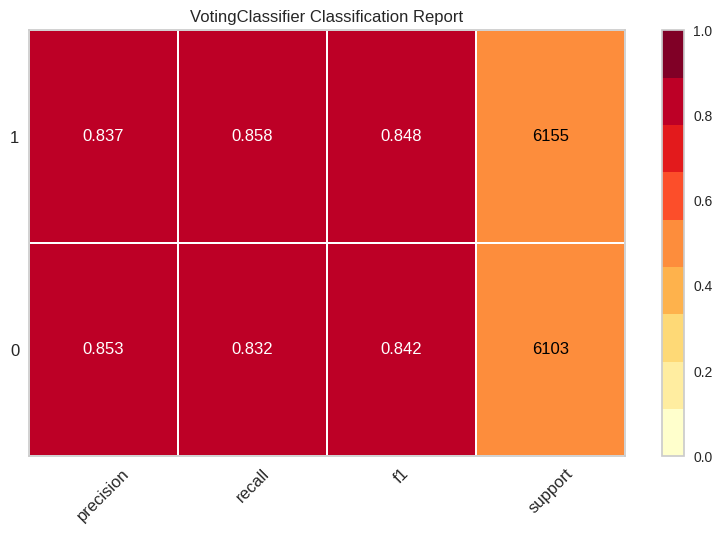

<Axes: title={'center': 'VotingClassifier Classification Report'}>

In [ ]:
# Instantiate the visualizer for Extra Trees
visualizer = ClassificationReport(blended_models, classes=[0,1], support=True)

# Fit the visualizer and generate the classification report
visualizer.score(X_test, y_test)
visualizer.show()


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

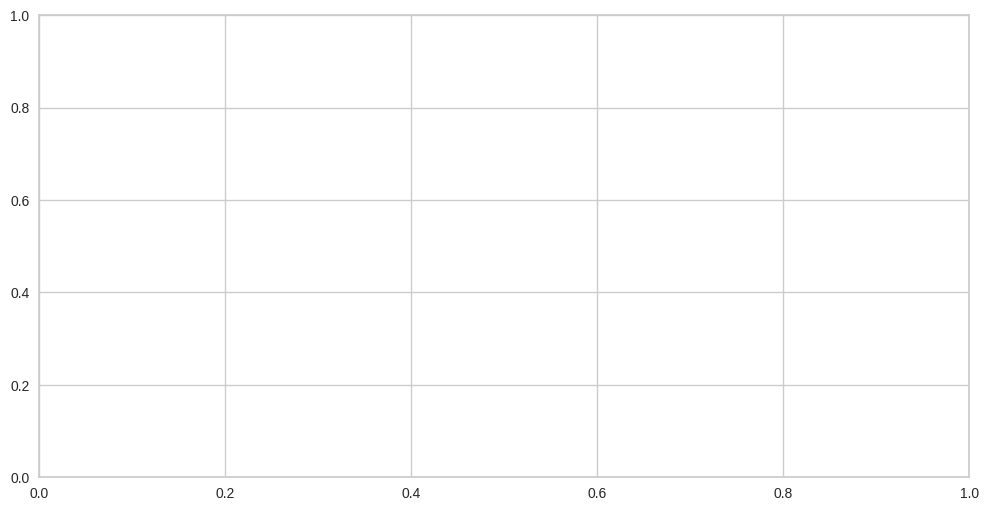

In [ ]:
evaluate_model(blended_models)